**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

In [96]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"



# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# IMAGE #

In [97]:
## below given figure is gray scale image with 0 as black and 255 as white...0 and 255 are pixel intensity

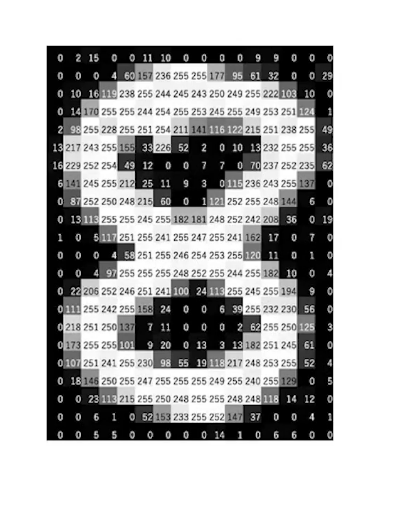

## Filters 

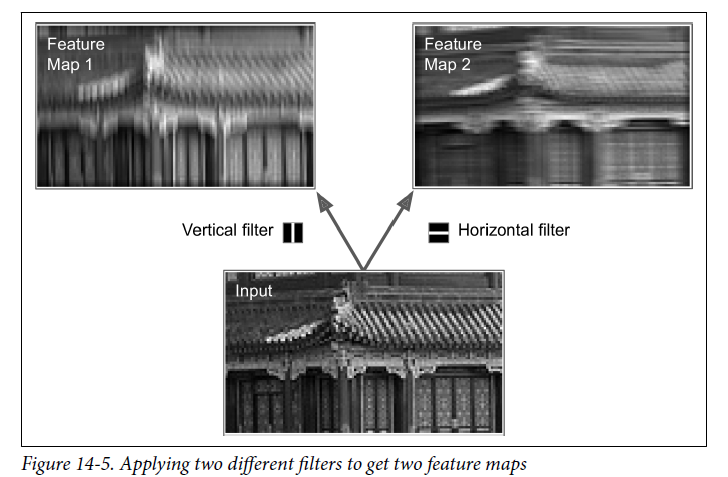

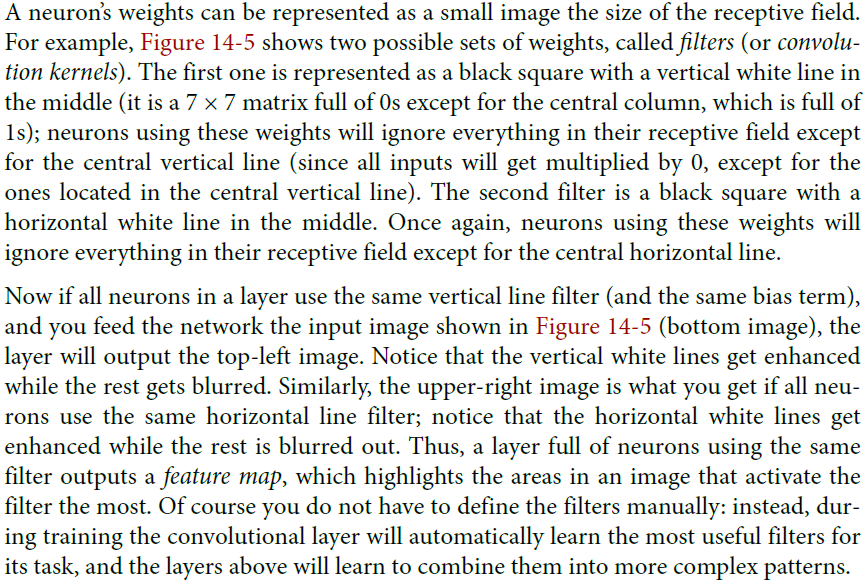

## STRIDE AND PADDING ##

In [98]:
## given below link is for stride and padding.

https://youtu.be/lxk_nmpqI5M

## POOLING LAYER ##

In [99]:
## max pooling also sets translational invariance and some amount of rotational invariance.

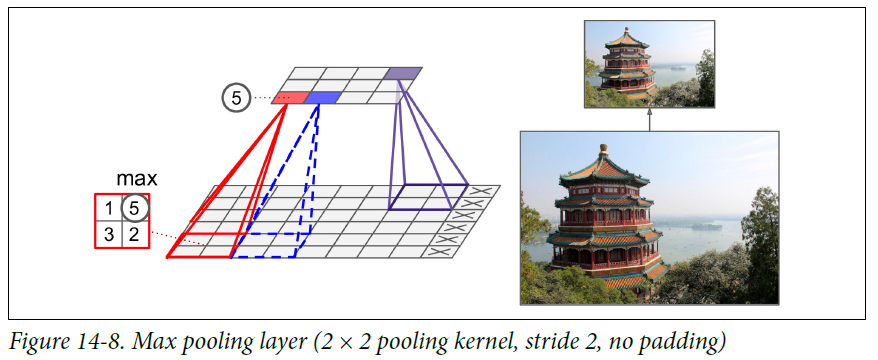

 Once you understand how convolutional layers work, the pooling layers are quite
easy to grasp. Their goal is to subsample (i.e., shrink) the input image in order to
reduce the computational load, the memory usage, and the number of parameters
(thereby limiting the risk of overfitting).

In [100]:
## ## below link explain the working of CNN with above term explained.

https://youtu.be/pj9-rr1wDhM

## TENSORFLOW IMPLEMENTATION ##

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

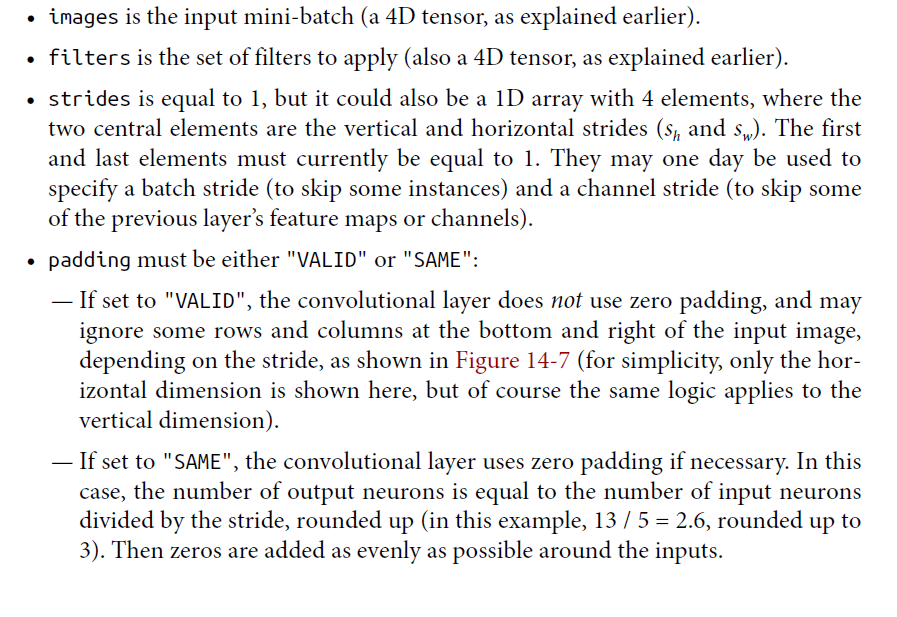

# # Convolutional Neural Network (CNN) for handwritten digit classification

In [101]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm #shows progress bar while training

In [102]:
## loading MNIST dataset from keras
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [103]:
train_images.shape

(60000, 28, 28)

In [104]:
#sample training image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [105]:
train_labels[0]

5

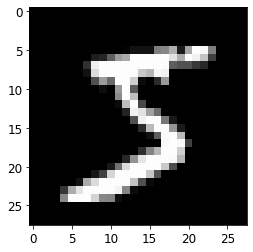

In [106]:
plt.imshow(train_images[0].reshape(28,28),cmap='gray')

In [107]:
#normalizing dataset
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [108]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [109]:
train_images.shape,test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

As we saw in lecture, convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Define the CNN model

We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use  [`keras.layers.Conv2D` ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to define convolutional layers and [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.

In [110]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu,input_shape=[28,28,1]),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 24)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 900)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the `compile` method. Compile the CNN model with an optimizer and learning rate of choice:

In [111]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

https://www.geeksforgeeks.org/intuition-of-adam-optimizer/

As was the case with the fully connected model, we can train our CNN using the `fit` method via the Keras API.

In [112]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_split=0.2, shuffle=True)
# cnn_model.fit('''TODO''')

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2024 - accuracy: 0.9410 - val_loss: 0.0700 - val_accuracy: 0.9793
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0553 - val_accuracy: 0.9840
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0441 - val_accuracy: 0.9874
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0439 - val_accuracy: 0.9877


Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [113]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9886
Test accuracy: 0.9886000156402588


### Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. The [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) function call generates the output predictions given a set of input samples.


In [114]:
predictions = cnn_model.predict(test_images)

In [115]:
test_labels[0]

7

In [116]:
predictions[0]

array([7.8537630e-09, 3.7474997e-08, 8.3149523e-08, 1.5038053e-05,
       7.6280605e-12, 2.0255855e-07, 5.8823308e-13, 9.9998319e-01,
       1.8639351e-07, 1.2358214e-06], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits. 

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [117]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 
# prediction = # TODO

print(prediction)

7


So, the model is most confident that this image is a "???". We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

Label of this digit is: 7


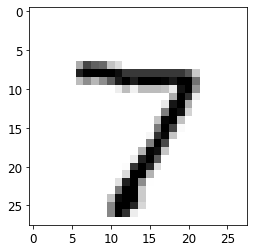

In [118]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

## Link is given below to study about different CNN architectures:

VGG Net

ResNet

Dense Net

Inception Net

Xception Net

https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049